# HDF5 文件结构解析
解析 `closing_the_lid.hdf5` 文件的目录结构和字段信息

In [2]:
import h5py
import numpy as np
from pathlib import Path

In [3]:


path = '../rawData/LEGATO/closing_the_lid_real.hdf5'  # 或 dataset_cup.hdf5 / dataset_ladle.hdf5
with h5py.File(path, "r") as f:
    def walk(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(name, obj.shape, obj.dtype)
        else:
            print(name, "(group)")
    f.visititems(walk)


data (group)
data/demo_1 (group)
data/demo_1/actions (197, 7) float32
data/demo_1/dones (197,) uint8
data/demo_1/obs (group)
data/demo_1/obs/delta_eulers (197, 6) float32
data/demo_1/obs/delta_positions (197, 6) float32
data/demo_1/obs/delta_quaternions (197, 8) float32
data/demo_1/obs/graspings (197, 2) float32
data/demo_1/obs/left_gray (197, 128, 128, 1) uint8
data/demo_1/obs/right_gray (197, 128, 128, 1) uint8
data/demo_1/rewards (197,) float32
data/demo_10 (group)
data/demo_10/actions (184, 7) float32
data/demo_10/dones (184,) uint8
data/demo_10/obs (group)
data/demo_10/obs/delta_eulers (184, 6) float32
data/demo_10/obs/delta_positions (184, 6) float32
data/demo_10/obs/delta_quaternions (184, 8) float32
data/demo_10/obs/graspings (184, 2) float32
data/demo_10/obs/left_gray (184, 128, 128, 1) uint8
data/demo_10/obs/right_gray (184, 128, 128, 1) uint8
data/demo_10/rewards (184,) float32
data/demo_100 (group)
data/demo_100/actions (201, 7) float32
data/demo_100/dones (201,) uint8
data

In [2]:
from pathlib import Path
import h5py

# 打开文件并保持句柄在变量 f 中（需要手动关闭）
path = Path('../rawData/LEGATO/closing_the_lid.hdf5')
f = h5py.File(path, 'r')
ds_actions = f['data/demo_1/actions']  # 保持为 Dataset 变量

# 查看形状与前几行
print(f'shape={ds_actions.shape}, dtype={ds_actions.dtype}')
print('前 3 行:')
print(ds_actions[:12])

# 之后的单元格可以直接使用 ds_actions，如 ds_actions[10:15]
 # 用完记得手动关闭： f.close()

shape=(235, 7), dtype=float32
前 3 行:
[[ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.00738615  0.00047469 -0.00177545  0.00053259  0.00116266  0.0007267

In [15]:
from pathlib import Path
import h5py

# 统计 demo 数量并查看单个 demo 的层级结构
path = Path('../rawData/LEGATO/cup_shelving_real.hdf5')
with h5py.File(path, 'r') as f_view:
    data_group = f_view['data']
    demo_names = sorted([k for k in data_group.keys() if k.startswith('demo_')], key=lambda x: int(x.split('_')[1]))
    print(f'demo 总数: {len(demo_names)}')
    print('前 10 个名称:', demo_names[:10])

    # 查看 demo_2 的层级结构
    demo = data_group['demo_2']
    def walk(name, obj):
        indent = '  ' * name.count('/')
        if isinstance(obj, h5py.Dataset):
            print(f"{indent}📄 {name.split('/')[-1]} {obj.shape} {obj.dtype}")
        else:
            print(f"{indent}📁 {name.split('/')[-1]}")
    print('\n demo_2 结构:')
    demo.visititems(walk)

demo 总数: 150
前 10 个名称: ['demo_1', 'demo_2', 'demo_3', 'demo_4', 'demo_5', 'demo_6', 'demo_7', 'demo_8', 'demo_9', 'demo_10']

 demo_2 结构:
📄 actions (183, 7) float32
📄 dones (183,) uint8
📁 obs
  📄 delta_eulers (183, 6) float32
  📄 delta_positions (183, 6) float32
  📄 delta_quaternions (183, 8) float32
  📄 left_gray (183, 128, 128, 1) uint8
  📄 right_gray (183, 128, 128, 1) uint8
📄 rewards (183,) float32


=== demo_1 - Frame 12 ===
Action: [ 0.023146242  -0.0025084382 -0.0073194937 -0.010201718   0.005962537
  0.035189167   0.          ]
Dones: 0
Rewards: 0.0
obs/delta_eulers: [ 0.            0.            0.           -0.0045865327  0.0032463437
  0.01630227  ]
obs/delta_positions: [ 0.            0.            0.            0.007221239  -0.003592372
 -0.0009187546]
obs/delta_quaternions: [ 0.            0.            0.            1.           -0.0023064157
  0.0016044205  0.008154735   0.9999628   ]
obs/position_diffs: [0. 0. 0. 0. 0. 0.]
obs/quaternions: [0. 0. 0. 1. 0. 0. 0. 1.]


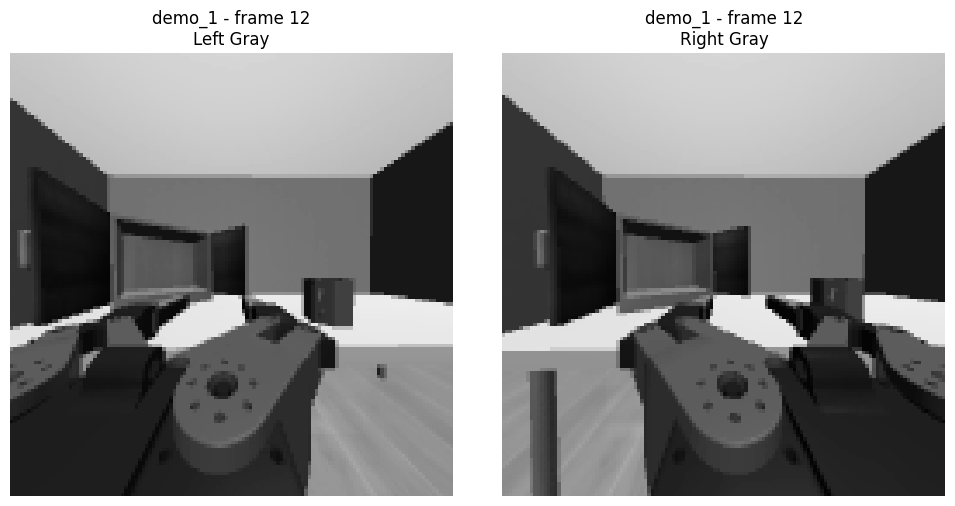

In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ===== 配置参数 =====
demo_id = 1      # demo 编号 (1-150)
frame_idx = 12   # 帧索引 (试试 0, 12, 100 等)
path = Path('../rawData/LEGATO/cup_shelving.hdf5') # 确保路径正确

# 设置打印精度
np.set_printoptions(precision=10, suppress=True)

# 读取数据
demo_name = f"demo_{demo_id}"
print(f"=== {demo_name} - Frame {frame_idx} ===")

with h5py.File(path, 'r') as f:
    demo = f['data'][demo_name]
    
    # 1. 打印 Action
    if 'actions' in demo:
        print(f"Action: {demo['actions'][frame_idx]}")
        
    # 2. 打印 Dones 和 Rewards
    if 'dones' in demo:
        print(f"Dones: {demo['dones'][frame_idx]}")
    if 'rewards' in demo:
        print(f"Rewards: {demo['rewards'][frame_idx]}")
        
    # 3. 打印 obs 下的所有非图像字段
    if 'obs' in demo:
        obs = demo['obs']
        sorted_keys = sorted(obs.keys())
        for key in sorted_keys:
            data = obs[key]
            # 跳过图像数据 (通常维度为 3 或 4)
            if len(data.shape) >= 3:
                continue
                
            print(f"obs/{key}: {data[frame_idx]}")

    # 4. 获取图像数据
    left_gray = demo['obs']['left_gray'][frame_idx]   # (128, 128, 1)
    right_gray = demo['obs']['right_gray'][frame_idx] # (128, 128, 1)
    
    # 去掉最后一个通道维度用于显示 (128, 128, 1) -> (128, 128)
    left_cur = left_gray.squeeze()
    right_cur = right_gray.squeeze()

# 5. 可视化图像
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(left_cur, cmap='gray', vmin=0, vmax=255)
axes[0].set_title(f'{demo_name} - frame {frame_idx}\nLeft Gray')
axes[0].axis('off')

axes[1].imshow(right_cur, cmap='gray', vmin=0, vmax=255)
axes[1].set_title(f'{demo_name} - frame {frame_idx}\nRight Gray')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
📁 /
├── 📁 data/
│   ├── 📁 demo_1/ ... demo_99/    (共 99 个演示)
│   │   ├── 📄 actions         (N, 7) float32    # 机器人动作
│   │   ├── 📄 dones           (N,) uint8        # 是否结束
│   │   ├── 📄 rewards         (N,) float32      # 奖励值
│   │   └── 📁 obs/                              # 观测数据
│   │       ├── 📄 delta_eulers      (N, 6) float32   # 欧拉角增量
│   │       ├── 📄 delta_positions   (N, 6) float32   # 位置增量
│   │       ├── 📄 delta_quaternions (N, 8) float32   # 四元数增量
│   │       ├── 📄 left_gray         (N, 128, 128, 1) uint8  # 左相机灰度图
│   │       ├── 📄 position_diffs    (N, 6) float32   # 位置差
│   │       ├── 📄 quaternions       (N, 8) float32   # 四元数
│   │       └── 📄 right_gray        (N, 128, 128, 1) uint8  # 右相机灰度图
│   │
└── 📁 mask/
    ├── 📄 train    (135,) |S8    # 训练集 demo 名称列表
    └── 📄 valid    (15,) |S8     # 验证集 demo 名称列表